## Rental Vacancy Rates - Zipcode and National Data
### Exploratory Data Analysis 

### Goal:
Explore the data relationships of all your features and understand how the features compare to the response variable.

● Build data profiles and tables
    ○ Inferential statistics
● Explore data relationships
    ○ Data visualization
● Feature Selection and Engineering

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as ss
from pandas_profiling import ProfileReport
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
#get path to data
path= '/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_2/data/interim'
os.chdir(path)
os.getcwd()

'/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_2/data/interim'

In [3]:
os.listdir()

['.gitkeep',
 '.ipynb_checkpoints',
 'ACS_rentsPrices_2011_2018.csv',
 'ACS_zillow_2011_2018.csv',
 'Annual_fredData_2011_2019',
 'df3_1956',
 'df_homePrices_2011_2018',
 'df_homePrices_2011_2020',
 'df_homePrices_2011_2020.csv',
 'df_rentPrices_2014_2020',
 'df_rentPrices_2014_2020.csv',
 'master_complete_for_EDA.csv',
 'VacancyRate_Zipcode_2011_2018',
 'VacancyRate_Zipcode_2011_2018.csv',
 'VacancyRate_Zipcode_AND_National_2011_2020.csv',
 'zillow_rentPrices_2014_2020.csv']

In [4]:
# load cleaned data
df = pd.read_csv('VacancyRate_Zipcode_AND_National_2011_2020.csv', dtype={'Zipcode': object}, parse_dates=['Year'])
df

,Zipcode,Vacancy_Rate%,MOE-VacancyRate%,Year
0,02333,3.024027,2.199925,2011-01-01
1,02338,3.116343,2.948791,2011-01-01
2,02339,4.464646,2.066438,2011-01-01
3,02341,3.586322,2.340722,2011-01-01
4,02343,3.732901,2.926524,2011-01-01
...,...,...,...,...
264965,NATNL,6.850000,0.000000,2016-01-01
264966,NATNL,7.175000,0.000000,2017-01-01
264967,NATNL,6.875000,0.000000,2018-01-01
264968,NATNL,6.750000,0.000000,2019-01-01



## Build data profiles and tables
#### Inferential statistics¶
Hint: do any particular results in your data strike you as abnormal?

**my answer**

What hypotheses can you form (Null and Alternative hypotheses) which you could go on to test?

-Null hypotheses: 

-Alternative hyptotheses: 

Take some time to recall your statistical concepts, such as that the p-value of an observation is the probability of seeing data at least as extreme as that observation, on the assumption of the null hypothesis.

In [5]:
#profile = ProfileReport(df)
#profile

<AxesSubplot:xlabel='Year', ylabel='Vacancy_Rate%'>

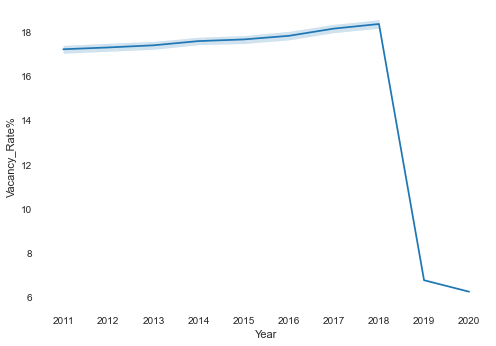

In [9]:
#graph Vacancy Rate vs. Year
sns.lineplot(data=df, x='Year', y='Vacancy_Rate%')

In [12]:
#code to visualize the time series and test for stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [14]:
#try it out, but error?
test_stationarity(df['Vacancy_Rate%'])

AttributeError: module 'pandas' has no attribute 'rolling_mean'